In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [146]:
df = pd.read_csv('benchmark_data.csv')
df = df.drop(columns=["Unnamed: 0"])
df_optim = df[df["Optimisation_time"]!=0]
df = df[df["Optimisation_time"]==0]
df = df.drop(columns=["Optimisation_time"])
map_sizes = ["small", "medium", "large", "xlarge"]
obstacle_coverages = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
algorithms = ["astar", "rrt", "rrt*", "informed rrt*", "fmt*", "bit*"]

In [147]:
print(df.columns)
print(pd.unique(df["Algorithm"]))

Index(['Algorithm', 'Size', 'Obstacle Coverage', 'Path Length', 'Time'], dtype='object')
['astar' 'rrt' 'rrt*' 'informed rrt*' 'bit*']


In [148]:
def process_data(data):
    columns = data.columns
    algorithms = pd.unique(data["Algorithm"])
    algo_data = {}
    for algorithm in algorithms:
        algo_data[algorithm] = data[data["Algorithm"]==algorithm].groupby(["Size", "Obstacle Coverage"])
        mean = algo_data[algorithm].mean().rename(columns={'Path Length': 'Mean Length', 'Time': 'Mean Time'})
        var = algo_data[algorithm].var().rename(columns={'Path Length': 'Var Length', 'Time': 'Var Time'})
        algo_data[algorithm] = pd.concat([mean, var], axis=1)
    return algo_data

In [149]:
algo_data = process_data(df)
algo_data_optim = process_data(df_optim)

C:\Users\masn2601\AppData\Local\Temp\ipykernel_29868\1317702398.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = algo_data[algorithm].mean().rename(columns={'Path Length': 'Mean Length', 'Time': 'Mean Time'})
C:\Users\masn2601\AppData\Local\Temp\ipykernel_29868\1317702398.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var = algo_data[algorithm].var().rename(columns={'Path Length': 'Var Length', 'Time': 'Var Time'})
C:\Users\masn2601\AppData\Local\Temp\ipykernel_29868\1317702398.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, n

In [152]:
def plot_timeLength(data):
    large30Data = pd.DataFrame()
    for algo in data.keys():
        large30Data = pd.concat([large30Data, data[algo].loc['large', 10]], axis=1)
    large30Data = large30Data.T
    large30Data.index = list(data.keys())
    large30Data = large30Data.reset_index().rename(columns={'index': 'Algorithm'})
    colorlist = list(colors.ColorConverter.colors.keys())
    fig, ax = plt.subplots()
    [large30Data.iloc[[i]].plot.scatter('Mean Time', 'Mean Length', ax=ax, s=50, label=l, color=colorlist[i % len(colorlist)], logy=True, yerr='Var Length',  grid=True)  for i,l in enumerate(list(data.keys()))]

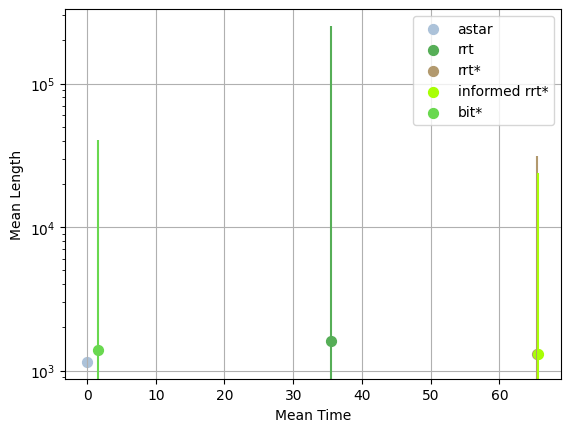

In [153]:
plot_timeLength(algo_data)

In [ ]:
def plot_optimisation(data):
    pass